In [78]:
import sys
sys.path.insert(0,'..')

In [79]:
import pandas as pd
from src import embeddings

df = pd.read_csv('../output/armando_with_sentiment.csv')
headlines = list(df['headline'])

# Compute Sentiments

In [6]:
# from transformers import pipeline

# # Instantiate model
# nlp = pipeline('sentiment-analysis', model='finiteautomata/bertweet-base-sentiment-analysis')

emoji is not installed, thus not converting emoticons or emojis into text. Please install emoji: pip3 install emoji


In [7]:
# Compute sentiments
# sentiments = nlp(headlines, return_all_scores=True)
# sent_list = [{'neg': neg['score'], 'neu': neu['score'], 'pos': pos['score']} for neg, neu, pos in sentiments]
# sent_df = pd.DataFrame(sent_list)

# # Add sentiments to data
# df = pd.concat([df, sent_df], axis=1)

/home/wilcoln/anaconda3/envs/citadel/lib/python3.9/site-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [8]:
# df.to_csv('../output/armando_with_sentiment.csv')

# Compute Lengths

In [33]:
df['hl_len'] = df['headline'].str.len()

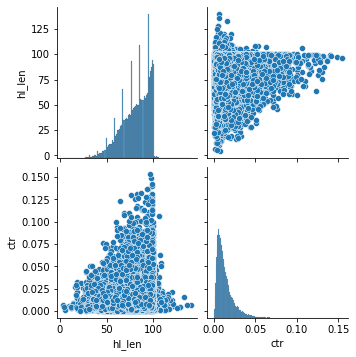

In [16]:
import seaborn as sns

sns.pairplot(df[['hl_len', 'ctr']])

# Compute Named Entities

In [12]:
import spacy
from tqdm import tqdm
nlp = spacy.load("en_core_web_sm")

ners = []
for hl in tqdm(headlines):
    doc = nlp(hl)
    hl_ners = {}

    for ent in doc.ents:
        hl_ners[ent.label_] = [ent.start_char, ent.end_char]

    ners.append(hl_ners)

100%|████████████████████████████████████| 66972/66972 [08:24<00:00, 132.72it/s]


In [24]:
ners[:5]

[{}, {}, {}, {'CARDINAL': [4, 5]}, {}]

In [16]:
all_keys = list(set().union(*(d.keys() for d in ners)))

In [17]:
all_keys

['LOC',
 'PERSON',
 'WORK_OF_ART',
 'LANGUAGE',
 'PRODUCT',
 'QUANTITY',
 'DATE',
 'CARDINAL',
 'GPE',
 'TIME',
 'ORG',
 'LAW',
 'MONEY',
 'FAC',
 'EVENT',
 'PERCENT',
 'NORP',
 'ORDINAL']

In [21]:
ners_dict = {key: [-1]*len(ners) for key in [f'{k}_start' for k in all_keys] + [f'{k}_end' for k in all_keys]}

for i, ner in enumerate(ners):
    for ent_type, span in ner.items():
        start, end = span
        ners_dict[f'{ent_type}_start'][i] = start
        ners_dict[f'{ent_type}_end'][i] = end

In [26]:
ners_df = pd.DataFrame(ners_dict)
ners_df[:5]

0   -1
1   -1
2   -1
3    5
4   -1
Name: CARDINAL_end, dtype: int64

In [23]:
ners_df.describe()

,LOC_start,PERSON_start,WORK_OF_ART_start,LANGUAGE_start,PRODUCT_start,QUANTITY_start,DATE_start,CARDINAL_start,GPE_start,TIME_start,...,GPE_end,TIME_end,ORG_end,LAW_end,MONEY_end,FAC_end,EVENT_end,PERCENT_end,NORP_end,ORDINAL_end
count,66972.000000,66972.000000,66972.000000,66972.000000,66972.000000,66972.000000,66972.000000,66972.000000,66972.000000,66972.000000,...,66972.000000,66972.000000,66972.000000,66972.000000,66972.000000,66972.000000,66972.000000,66972.000000,66972.000000,66972.000000
mean,-0.739563,3.259273,2.798259,-0.974362,-0.892179,-0.963209,0.951353,0.960386,0.953189,-0.530938,...,1.276787,-0.363167,4.151018,-0.780326,-0.660022,-0.833139,-0.624739,-0.750239,-0.053545,-0.532088
std,4.052974,14.766617,13.639563,1.187584,2.664539,1.389724,10.444552,9.913299,10.613130,5.134294,...,11.820855,6.331831,17.582649,3.895566,4.416843,3.384920,4.849236,3.744927,7.372543,5.261347
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
75%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
max,95.000000,108.000000,108.000000,92.000000,94.000000,87.000000,103.000000,99.000000,114.000000,93.000000,...,116.000000,100.000000,111.000000,100.000000,100.000000,100.000000,100.000000,100.000000,106.000000,100.000000


In [27]:
ners_df = ners_df + 1

In [34]:
df = pd.concat([df, ners_df], axis=1)

In [81]:
df = pd.read_csv('../output/armando_with_all_features.csv')
ner_keys = ['LOC', 'PERSON', 'WORK_OF_ART','LANGUAGE','PRODUCT','QUANTITY','DATE','CARDINAL','GPE','TIME','ORG','LAW','MONEY','FAC','EVENT','PERCENT','NORP','ORDINAL']
ner_cols = [f'{k}_start' for k in ner_keys] # + [f'{k}_end' for k in ner_keys]
other_features = ['hl_len', 'neg', 'neu', 'pos'] + ner_cols
df[ner_cols] = df[ner_cols].astype('bool').astype('int')

In [82]:
df = df.rename(columns={f'{k}_start':k for k in ner_keys})

In [83]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'created_at',
       'test_week', 'test_id', 'headline', 'image_id', 'excerpt', 'lede',
       'slug', 'share_text', 'share_image', 'impressions', 'clicks',
       'first_place', 'winner', 'ctr', 'high_ctr_test', 'high_ctr_test_image',
       'neg', 'neu', 'pos', 'hl_len', 'LOC', 'PERSON', 'WORK_OF_ART',
       'LANGUAGE', 'PRODUCT', 'QUANTITY', 'DATE', 'CARDINAL', 'GPE', 'TIME',
       'ORG', 'LAW', 'MONEY', 'FAC', 'EVENT', 'PERCENT', 'NORP', 'ORDINAL',
       'LOC_end', 'PERSON_end', 'WORK_OF_ART_end', 'LANGUAGE_end',
       'PRODUCT_end', 'QUANTITY_end', 'DATE_end', 'CARDINAL_end', 'GPE_end',
       'TIME_end', 'ORG_end', 'LAW_end', 'MONEY_end', 'FAC_end', 'EVENT_end',
       'PERCENT_end', 'NORP_end', 'ORDINAL_end'],
      dtype='object')

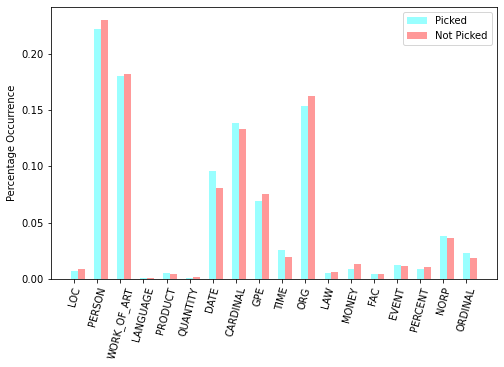

In [91]:
import matplotlib.pyplot as plt
import numpy as np

def div_d(my_dict):
    sum_p = sum(my_dict.values())
    for i in my_dict:
        my_dict[i] = float(my_dict[i]/sum_p)
    return my_dict

picked_densities = {}
not_picked_densities = {}


classes_ = ner_keys


for clas in ner_keys:
    picked_densities[clas] = df[(df[clas] == 1) & (df['high_ctr_test'] == True)][clas].count()
    not_picked_densities[clas] = df[(df[clas] == 1) & (df['high_ctr_test'] == False)][clas].count()
    

picked_densities = div_d(picked_densities)
not_picked_densities = div_d(not_picked_densities)
order = np.arange(len(classes_))


plt.figure(figsize=(8,5)) 

plt.bar(order, list(picked_densities.values()), width=0.3, color='cyan', align='center', label = 'Picked', alpha=0.4)
plt.bar(np.array(order)+0.3, list(not_picked_densities.values()), width=0.3, color='red', align='center', label = 'Not Picked', alpha=0.4)
plt.legend()
plt.xticks(order,classes_, rotation='75')
plt.ylabel('Percentage Occurrence')
# plt.yscale('log'
plt.show()

In [97]:
pd.DataFrame({'Picked': picked_densities.values(), 'Not Picked': not_picked_densities.values()})*100

,Picked,Not Picked
0,0.713977,0.906843
1,22.230636,22.976398
2,18.011683,18.185704
3,0.129814,0.073280
4,0.508438,0.476321
5,0.086543,0.180147
6,9.606231,8.076089
7,13.825184,13.291197
8,6.880138,7.572288
9,2.596279,1.969406


In [36]:
df.to_csv('../output/armando_with_all_features.csv')